# Flood Risks
This notebook describes the computations behind the risks mentioned in the
[readme](https://github.com/Bolius/flood_risk).


In [31]:
# Imports
import base64
import os, sys
from PIL import Image
from io import BytesIO
%load_ext autoreload
%autoreload 2
sys.path.insert(1, os.path.join(os.path.abspath(os.path.pardir),"code"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Hollowings
A house located in a hollowing (lavning) has an increases increased risk of flooding
when heavy rain occurs.

The data used comes from the _danish height model_ data set from
[kortforsyningen](https://kortforsyningen.dk/indhold/webservice-liste-0). The
data format used is the [wms](https://en.wikipedia.org/wiki/Web_Map_Service)
format. We retrieve a series of images where for instance the pixel value for
indicates how big a hollowing is.

The computation consists of the following steps:

1.  _Adress lookup:_ Convert an address of the form
    `Kjærmarken 103, 6771 gredstedbro` into a set of longitude and latitude.
2.  _Image retrial:_ Convert the longitude and latitude into images.
    -   Hollowing Image: An image that shows where flooding might occur.
    -   Building Image: An image showing the location of buildings in the area.
3.  _Compute the risk:_ Transform the images and compute the overlap between
    buildings and hollowings
4.  _Construct final image:_ Combine the data images with a satellite image
    which illustrates the computation in a manner suitable for an end user.


{'house_percentage': 27.58, 'area_percentage': 23.47, 'risk': 'high'}


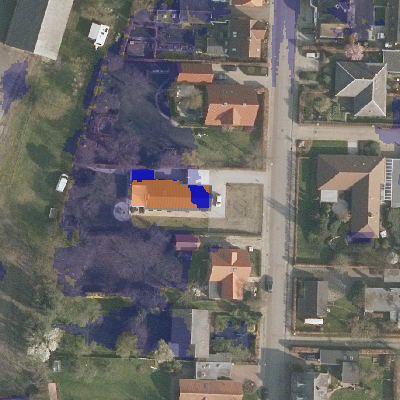

In [36]:
from lib import get_hollowing_response, address_to_house_data
data = address_to_house_data("Dronning Dagmars vej 13, 6760 Ribe")
resp = get_hollowing_response(data["coordinates"])
image = resp.pop("image")
print(resp)
Image.open(BytesIO(base64.b64decode(image)))

As seen in the image, the isolated building gets a color marking, the blue spots
represent a hollowing, a bright blue spot represent a hollowing touching a
house. The risk depends on the percentage of the house that is touching a
hollowing, the subject experts at Bolius determined the thresholds.


## Fastening degree

The fastening degree (Befæstelsesgrad) indicates how much of an area consists of
bricks, concrete or other surfaces that can't drain water. A high fastening
degree means that the water must go to the sewer, and increases the likelihood
of flooding.

The danish ministry for the environment has a data set which includes the
fastening degree for an area.

The data set is a [WMS map][wms] as with the hollwings.
A [txt file](https://mst.dk/service/miljoegis/hent-data/) also exists. The WMS
service has the benefit that we can show an image and a number to the end user

The steps are similar to the hollowing:

1.  _Adress lookup:_ Convert an address of the form
    `Kjærmarken 103, 6771 gredstedbro` into a set of longitude and latitude.
2.  _Image retrial:_ Convert the longitude and latitude into an image.
    -   Fastening image: An image that shows the ground type.
3.  _Compute the risk:_ Transform the image and compute the average fasting
    degree in the area
4.  _Construct final image:_ Combine the data image with a satellite image
    which illustrates the computation in a manner suitable for an end user.

[wms]: http://miljoegis.mim.dk/spatialmap?mapheight=655&mapwidth=1924&label=&ignorefavorite=true&profile=miljoegis-klimatilpasningsplaner&selectorgroups=nedboer&layers=theme-gst-dtkskaerm_daempet+theme-klimatilp-raster-arealanvendelse+userpoint+userline+userpolygon+bufferzone+smalluserpointsearch+smalluserlinesearch+smalluserpolygonsearch+smalluserpointfound+smalluserlinefound+smalluserpolygonfound+selectorpoint+selectorline+selectorpolygon+selectorbufferzone+redline-line+redline-point+redline-polygon+redline-circle+spatialanalyze-line+spatialanalyze-point+spatialanalyze-polygon+fr-dl-line+fr-dl-point+fn-dl-line+fn-dl-point&opacities=1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1&mapext=482143.8030704+6138988.00104+485214.1969296+6140027.99896&maprotation=


{'value': 53.26, 'risk': 'high'}


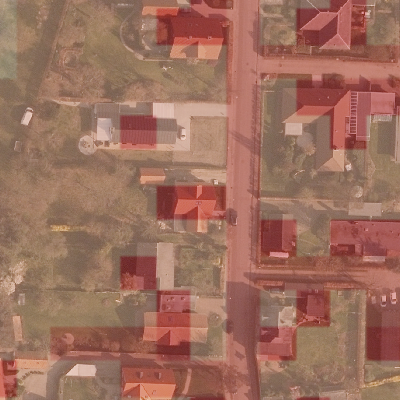

In [40]:
from lib import get_fastning_response, address_to_house_data
data = address_to_house_data("Dronning Dagmars vej 11, 6760 Ribe")
resp = get_fastning_response(data["coordinates"])
image = resp.pop("image")
print(resp)
Image.open(BytesIO(base64.b64decode(image)))

As seen in the image the dark red areas represents roads and buildings while
light red areas represents grass etc. The subject experts at Bolius set the risk
thresholds.

__TODO:__ Document conductivity, flood, and combination of results